# Wine Tasting with ML
<img style="float:left; max-height:250px" src="Wine.png">

### Import Packages

In [ ]:
######## Install packages
#!pip install dtreeviz

######## Other libraries
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

# from sklearn.metrics import mean_absolute_error, log_loss, f1_score, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
# from sklearn import tree
# from string import ascii_letters
#import graphviz

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

from matplotlib import pyplot as plt
import dtreeviz
import seaborn as sns

### Prepare Dataset

In [2]:
WINE_SCORE_LIMIT = 4
wine=pd.read_csv('winequality-red.csv', sep=';')
wine['quality'] = np.where(wine['quality']>=WINE_SCORE_LIMIT , 1,0) # 1 stands for decent wine,0 - cooking wine

Drop_cols=['volatile acidity','free sulfur dioxide','pH','sulphates','density']
wine=wine.drop(Drop_cols, axis=1)

wine=wine.rename(columns={"fixed acidity": "Sourness", "citric acid": "Fruitiness",
                          "residual sugar":"Sweetness","chlorides":"Saltiness","total sulfur dioxide":"Preservatives",
                         "alcohol":"Alcohol%","quality":"Quality"})
wine.to_csv('winequality-red-simp.csv', sep = ';', index = False)


### Sample Data and Feature Stats

In [ ]:
wine.head(5)

In [ ]:
wine.describe()

### Start thinking about drivers/features

##### Hypotheses
<font color='blue'> Start picking `top features` and `rank` them  </font>

### Correlation matrix


<Axes: >

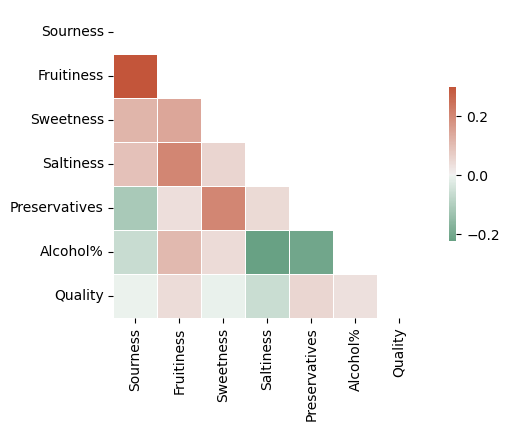

In [3]:
# Compute the correlation matrix
corr = wine.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(145, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
wine.describe()

## Model Build

### Model 1 - Single Feature, Small Tree

In [5]:
## Set random seed
rand_seed=123

In [6]:
## Select Features
y=wine['Quality']
features=[
    'Sourness',
    'Fruitiness',
    'Sweetness'
]
x=wine[features]

## Split data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = rand_seed)

## Train and fit model
winemodel1 = DecisionTreeClassifier(random_state=rand_seed, max_depth=5)
winemodel1.fit(train_x, train_y)
val_predictions1=winemodel1.predict(val_x)

print(val_predictions1)

model1_acc=round(accuracy_score(val_y, val_predictions1)*100,2)
model1_f1=round(f1_score(val_y, val_predictions1)*100,2)

print('Model 1 Accuracy=',model1_acc,'%')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Model 1 Accuracy= 99.75 %


In [ ]:
viz = dtreeviz.model(winemodel1,
            train_x,
            train_y,
            feature_names = train_x.columns,
            target_name = 'Wine categories',
            class_names = ['Goon de Dorm', 'FS Cuvee'])
viz.view()

### Model 2 - Selected Features; Bigger Tree

In [ ]:
## Select Features
y=wine['Quality']
features=[
    # 'Sourness',
    # 'Fruitiness',
     'Sweetness',
    # 'Saltiness',
    'Preservatives',
     'Alcohol%'
]
x=wine[features]

## Split data
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = rand_seed)

## Train and fit model
winemodel2 = DecisionTreeClassifier(random_state=rand_seed, max_depth=5)
winemodel2.fit(train_x, train_y)
val_predictions2=winemodel2.predict(val_x)

model2_acc=round(accuracy_score(val_y, val_predictions2)*100,2)
model2_f1=round(f1_score(val_y, val_predictions2)*100,2)

print('Model 1 Accuracy=',model1_acc,'%')
print('Model 2 Accuracy=',model2_acc,'%')

In [ ]:
viz = dtreeviz.model(winemodel2,
            train_x,
            train_y,
            feature_names = train_x.columns,
            target_name = 'Wine categories',
            class_names = ['Goon de Dorm', 'FS Cuvee'])
viz.view()

### <font color='Green'> What does the prediction look like? </font>

In [ ]:
actual_output=pd.concat((val_x,val_y,
                        pd.DataFrame(val_predictions2,index = val_x.index.copy(),columns=['Predicted']),
                        pd.DataFrame(winemodel2.predict_proba(val_x),index = val_x.index.copy(),columns=['a','Score']).drop(['a'],axis=1)
                        ),axis=1)

actual_output['Quality'] = np.where(actual_output['Quality']==1 , '1|🍷','0|💩') 
actual_output['Predicted'] = np.where(actual_output['Predicted']==1 , '1|🍷','0|💩') 
actual_output['Prediction Correct?']= np.where(actual_output['Quality']==actual_output['Predicted'],"✔️","❌")


actual_output= actual_output[features+['Score', 'Predicted','Quality','Prediction Correct?']]

actual_output.head(60)

### Model 3 - Every Feature

In [ ]:
# Run every feature through
y2=wine['Quality']
x2=wine.drop(['Quality'],axis=1)

train_x2, val_x2, train_y2, val_y2 = train_test_split(x2, y2, random_state = rand_seed)

winemodel3 = DecisionTreeClassifier(random_state=rand_seed, max_depth = 10)
winemodel3.fit(train_x2, train_y2)

val_predictions3=winemodel3.predict(val_x2)

model3_acc=round(accuracy_score(val_y2, val_predictions3)*100,2)
model3_f1=round(f1_score(val_y2, val_predictions3)*100,2)

print('Model 1 Accuracy=',model1_acc,'%')
print('Model 2 Accuracy=',model2_acc,'%')
print('Model 3 Accuracy=',model3_acc,'%')

#### Big Tree..... Keep Scrolling

In [ ]:
# Run every feature through random tree
#n_estimators is the number of trees in the forest!
winemodel4 = RandomForestClassifier(random_state=rand_seed, n_estimators = 250) 
winemodel4.fit(train_x2, train_y2)

winemodel4.predict(val_x2)

val_predictions4=winemodel4.predict(val_x2)

model4_acc=round(accuracy_score(val_y2, val_predictions4)*100,2)
model4_f1=round(f1_score(val_y2, val_predictions4)*100,2)

print('Model 1 Accuracy=',model1_acc,'%')
print('Model 2 Accuracy=',model2_acc,'%')
print('Model 3 Accuracy=',model3_acc,'%')
print('Model 4 Accuracy=',model4_acc,'%')

### <font color ='blue'>Audience Participation</font>

Quite a significant improvement of accuracy of our model
We can try optimising the model by <br>
* `Feature engineer` existing ones - can you think of an example?
* Bringing `new features`: for example region/coordinates, colour, grape variety
* `Tuning` the parameters of the model (called hyperparamaters in technical parlance) - the number and depth of trees, split rules etc
* Call in `experts`




### How do the models compare? 

In [ ]:
## Accuracy vs F1

AccVsF1=pd.DataFrame(
    [
        ['No Model','Blind Guess/Coin Toss',50,0],
        ['Model 1','Single Feature, Small Tree',model1_acc,model1_acc-50],
        ['Model 2','Selected Features',model2_acc,model2_acc-model1_acc],
        ['Model 3','All Features',model3_acc,model3_acc-model2_acc],
        ['Model 4','Random Forest',model4_acc,model4_acc-model3_acc]
        
    ],
    columns=['Model','Description','Accuracy%','Improvement'])

AccVsF1.head()

### Confusion Matrix

In [ ]:
print('Model 2 Accuracy=',model2_acc,'%')

cm1 = confusion_matrix(val_y, val_predictions2)
group_names = ['Goon correctly identified',
               'Goon identified as cuvee',
               'Cuvee identified as goon',
               'Cuvee correctly identified']

group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')